# Введение в анализ данных
## Домашнее задание 3. 


**Правила:**

* Дедлайн **17 мая 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 3 балла

Сложная часть (необходимо на "отл"):

* Задача 2 -- 2 балла
* Задача 3 -- 10 баллов
* Задача 4 -- 4 балла

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

## Легкая часть

Перед выполнением этой части настоятельно рекомендуется посмотреть ноутбук с лекции про закон больших чисел.

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*.

**a).** Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$


In [2]:
def count_deviations(
    distr,
    sample_size=300,
    samples_cnt=500
):
    '''
    Считает для распределения отклонение частичных сумм выборки
    от матожидания, нормированное на дисперсию этого отклонения.
    
    `distr`       - распределение
    `sample_size` - размер выборки
    `samples_cnt` - количество выборок
    '''
    samples = distr.rvs(size=(samples_cnt, sample_size))
    sums = samples.cumsum(axis=1)
    mean, variance = distr.stats()
    means = np.full((samples_cnt, sample_size), mean).cumsum(axis=1)
    variances = np.full((samples_cnt, sample_size), variance).cumsum(axis=1)
    return (sums - means) / np.sqrt(variances)

In [3]:
exp_deviation = count_deviations(sps.expon(1))

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

In [4]:
def visualize_deviation(
    deviation,
    distr_name
):
    '''
    Построение графика отклонения частичных сумм выборки распределения
    в зависимости от числа элементов в сумме.
    
    `deviation`  - значения отклонений
    `distr_name` - название распределения
    '''
    plt.figure(figsize=(14, 6))
    plt.title('Отклонение частичной суммы выборки {} от мат. ожидания'\
              .format(distr_name))
    plt.xlabel('Количество элементов суммы')
    plt.ylabel('Нормированное отклонение от мат. ожидания')
    for sample in deviation:
        plt.plot(sample, alpha=0.05, color='green')
    plt.show()

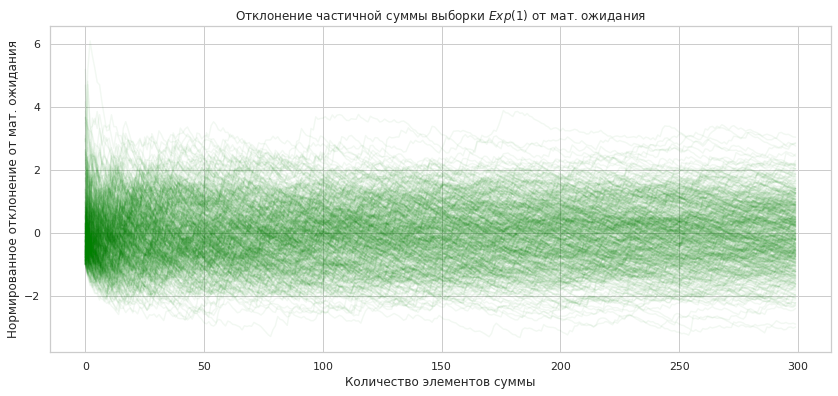

In [5]:
visualize_deviation(exp_deviation, r'$Exp(1)$')

Не похоже, чтобы сходилось к константе, да и не должно, ведь, как гласит центральная предельная теорема, распределение величин $Z_{jn}$ стремится к нормальному.

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

In [6]:
def hist_deviation(
    deviation,
    distr_name
):
    '''
    Построение гистограммы отклонения частичных сумм выборки распределения.
    
    `deviation`  - значения отклонений
    `distr_name` - название распределения
    '''
    plt.figure(figsize=(14, 6))
    plt.title('Гистограмма отклонений суммы выборки {} от мат. ожидания'\
              .format(distr_name))
    plt.xlabel('Величина нормированного отклонения')
    
    sns.distplot(
        deviation.T[-1],
        label='Отклонение'
    )
    grid = np.linspace(-3, 3, 100)
    plt.plot(
        grid,
        sps.norm.pdf(grid),
        label=r'$\mathcal{N}(0, 1)$'
    )
    plt.legend(loc='best')
    plt.show()

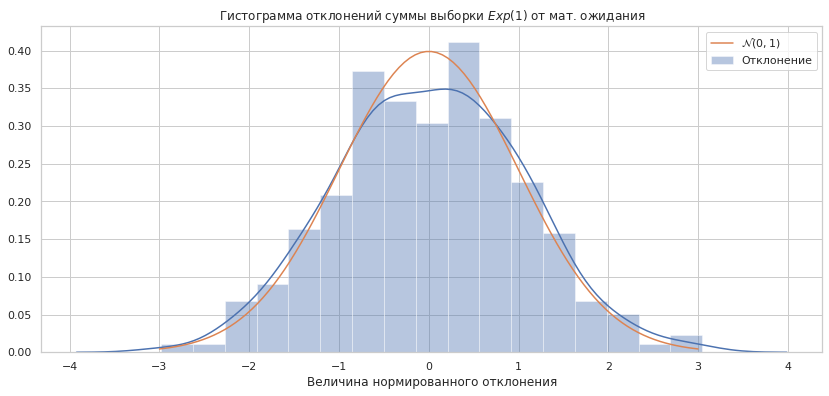

In [7]:
hist_deviation(exp_deviation, r'$Exp(1)$')

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

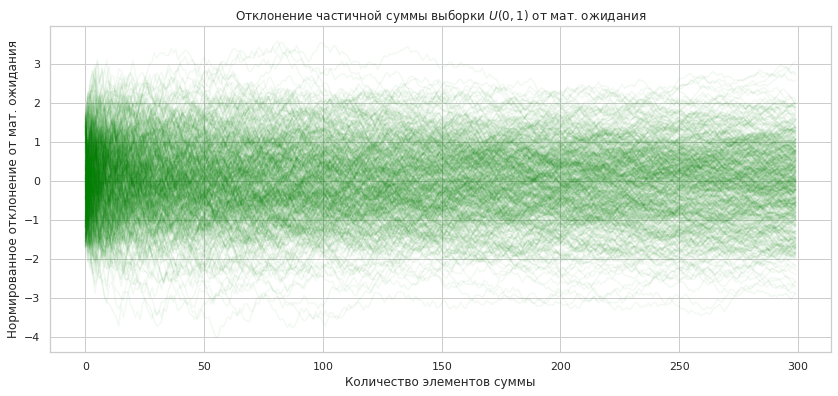

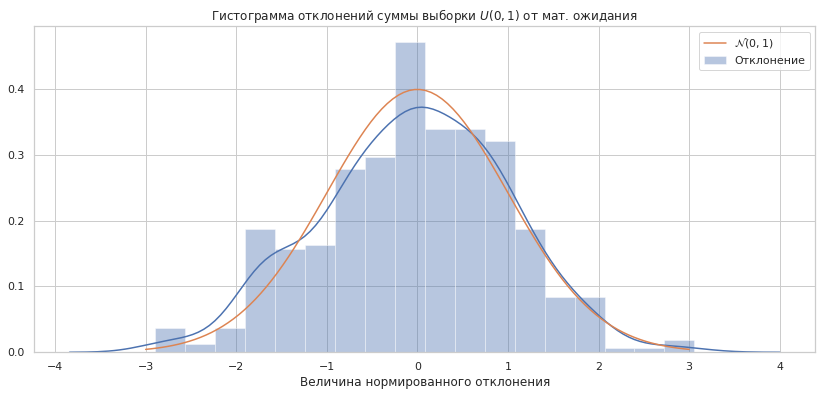

In [8]:
uniform_deviation = count_deviations(sps.uniform(0, 1))
visualize_deviation(uniform_deviation, r'$U(0,1)$')
hist_deviation(uniform_deviation, r'$U(0,1)$')

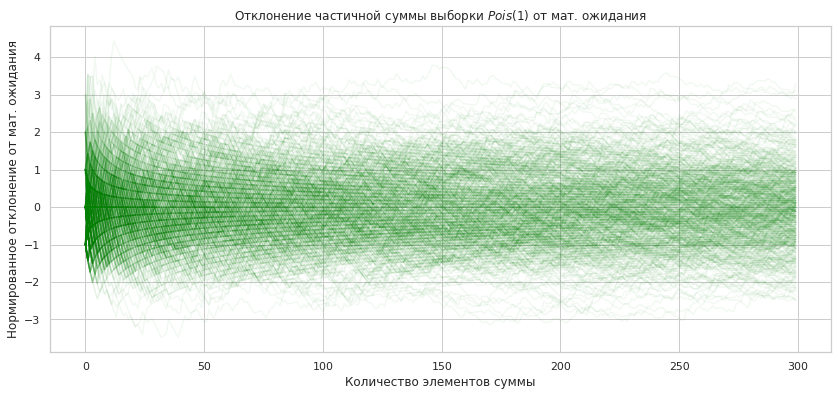

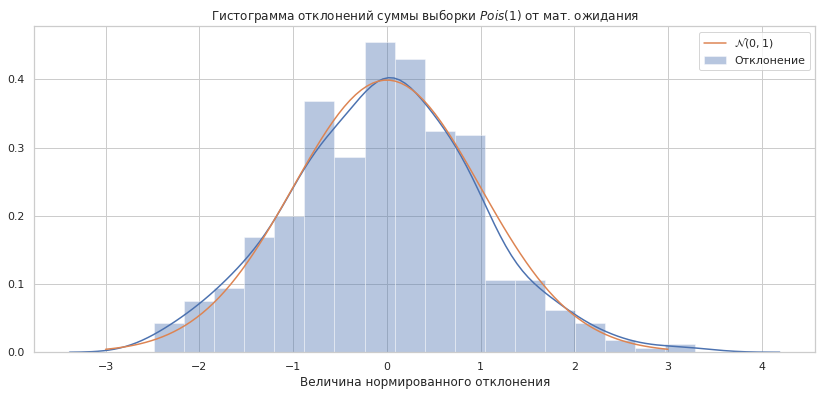

In [9]:
uniform_deviation = count_deviations(sps.poisson(1))
visualize_deviation(uniform_deviation, r'$Pois(1)$')
hist_deviation(uniform_deviation, r'$Pois(1)$')

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** центральная предельная теорема показывает, что случайные величины не могут слишком сильно отклоняться от своего математического ожидания -- если не сами величины, то среднее арифметическое выборки. И сделанные эксперименты это подтверждают -- отклонение суммы величин действительно имеет нормальное распределение.

## Сложная часть

### Задача 2.

В этой задаче нужно визуализировать *закон повторого логарифма*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из равномерного распределения на $\{-1, 1\}$. Согласно закону повторного логарифма траектория суммы $S_n = \xi_1 + ... + \xi_n$ при увеличении $n$ с вероятностью 1 бесконечное число раз пересекает границу $\pm (1-\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$, и лишь конечное число раз пересекает границу $\pm (1+\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов сумму в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Bern(1/2)$. По каждому из них посчитайте среднее $S_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумму по первым $n$ величинам $j$-го набора.

In [10]:
sample_size = 300
samples_cnt = 500
random_walks = np.cumsum(
    sps.bernoulli(0.5).rvs(size=(samples_cnt, sample_size)) * 2 - 1,
    axis=1
)

Для каждого $j$ нанесите на один график зависимость $S_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`.

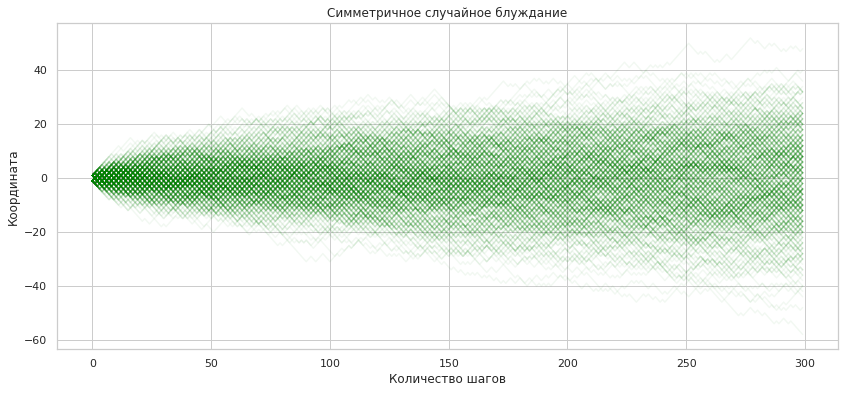

In [11]:
plt.figure(figsize=(14, 6))
plt.title('Симметричное случайное блуждание')
plt.xlabel('Количество шагов')
plt.ylabel('Координата')
for walk in random_walks:
    plt.plot(walk, alpha=0.05, color='green')
plt.show()

Для трех различных $n$ по набору случайных величин $S_{1,n}, ..., S_{500,n}$ постройте графих доли тех величин, которые выходят за порог $\pm с\sqrt{2n\log\log n}$ при изменении $c$ от 0.5 до 1.5. Графики стройте в строчку с помощью `plt.subplot`.

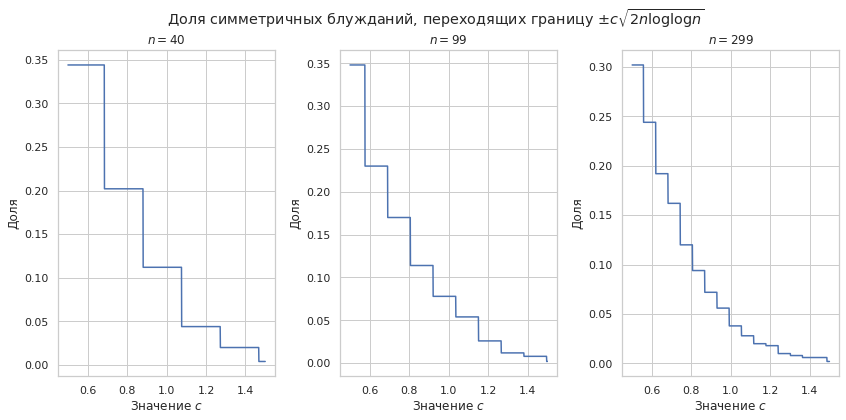

In [12]:
checkpoints = [40, 99, 299]
steps_cnt = 1000
consts = np.linspace(0.5, 1.5, steps_cnt).reshape(1, steps_cnt)

fig, axs = plt.subplots(1, 3, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)
plt.suptitle(
    r'Доля симметричных блужданий, переходящих'\
    ' границу $\pm c\sqrt{2n \log \log n}$'
)
for ax, slice_ind in zip(axs, checkpoints):
    edge = consts * np.full(
        (samples_cnt, 1),
        np.sqrt(2 * slice_ind * np.log(np.log(slice_ind)))
    )
    compare = np.abs(random_walks[:, slice_ind].reshape((samples_cnt, 1))) > edge
    crossed = compare.astype(np.int64).mean(axis=0)
    ax.plot(consts[0], crossed)
    ax.set_xlabel(r'Значение $c$')
    ax.set_ylabel('Доля')
    ax.set_title(r'$n = {}$'.format(slice_ind))

Сделайте вывод о смысле закона повторного логарифма. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** смысл закона повторного логарифма заключается в том, что почти всегда случайное блуждание происходит в границах $\pm \sqrt{2n \log \log n}$. По графикам видно, что с ростом числа шагов в блуждании вероятность выйти за эту границу уменьшается.

---
### Задача 3.

В этой задаче нужно проявить и визуализировать свое *творчество*.

Общий принцип:
* Придумать какую-либо цель исследования, поставить вопрос или гипотезы
* Собрать необходимый набор данных "руками" или с помощью кода.
* Сделать простой анализ полученного датасета в этом ноутбуке.
* Сделать вывод.

Основные требования к данным:
* Все собранные данные необходимо представить в виде одной или нескольких таблиц формата `csv` или `xls`. Эти файлы должны легко считываться при помощи `pandas`. **Все эти файлы необходимо прислать вместе с решением на почту.**
* По строкам таблиц должны располагаться исследуемые объекты, например, люди. Одному объекту соответствует одна строка. По столбцам должны располагаться свойства объекта, например, пол, возраст.
* При сборе данных "руками" вы самостоятельно выбираете количество исследуемых объектов исходя из времени, которое необходимо на это потратить. Рассчитываемое время -- 2-3 часа.
* При сборе данных с помощью кода ограничивайте себя только размером доступных данных, которые можно скачать за 2-3 часа или 10000 объектами.
* Во всех случаях количество исследуемых объектов должно быть **не менее 30**. Количество свойств объектов -- **не менее двух**.

Основные требования к исследованию:
* Заранее необходимо четко определиться с вопросом, который вы хотите исследовать. Например, "хочу исследовать взаимосвязь двух свойств".
* При анализе необходимо провести полную визуализацию данных. Все графики должны быть оформлены грамотно.
* Подумайте, как вы можете применить полученные математические знания по курсу теории вероятностей для анализа собранных данных?
* Примените их если это возможно. Например, у вас не должно возникнуть проблем с тем, чтобы посчитать среднее, подкрепив корректность такого подхода соответствующей теоремой. А взаимосвязь двух свойств вы вряд ли сейчас сможете оценить по данным.
* Полноценные выводы.

Ниже перечислены некоторые идеи, но вы можете придумать свою. 
* Исследование характеристик и вкусовых качеств овощей/фруктов/ягод. В качестве свойств можно рассмотреть высоту объекта, радиус в разрезе, цвет, тип, вкусовую оценку, дату покупки, дату употребления.
* Исследование характеристик листьев деревьев. В качестве свойств можно рассмотреть длину и ширину листа, цвет, тип растения.
* Характеристики товаров в интернет-магазине, включая рейтинг.
* Музыкальные исполнители и песни. В качестве свойств можно рассмотреть рейтинг артиста, количество треков, количество ремиксов, количество коллабораций.
* Кинофильмы, мультфильмы, аниме.
* Анализ новостных лент. На сайте https://www.similarweb.com/ можно посмотреть статистику различных издательств, на основе чего придумать правило оценки степени "доверия" изданию. Исследуйте, какие новости первым публикует издание с наибольшим значением доверия? Опросите знакомых об отношении к этим новостям.
* Анализ данных пабликов ВК.
* Анализ схожести сайтов или блогов по частоте упоминания какой-либо темы.

Я захотел посмотреть на оценки телефонов на какой-либо популярной платформе и их зависимость от характеристик телефонов (цена и т.п.). Для это бы идеально подходил Яндекс Маркет, если бы не одно но: скрапингу сайт упорно сопротивляется, даже переподключение к впн не помогает, а API мало того что платное, так ещё к нему уже не первый год новые ключи не выдают. Есть e-katalog, но на нём странная система оценки (4х балльная) и маловато отзывов (меньше,чем на Я.Маркете), по крайней мере на первый взгляд. Ozon, как ни странно, скрапингу не сопротивляется, но смотреть отзвы напрямую на торговой площадке -- сомнительное удовольствие, очевидно, что они хотят, чтобы я у них деньги потратил, поэтому негативные отзывы им не выгодны. Поэтому я всё-таки решил спарсить e-katalog, благо у них прямо на странице поиска выдаёт кучу характеристик, меньше мороки со сбором данных. Поразмыслив, я выделил из характеристик следующие: диагональ экрана, наличие NFC, толщина корпуса, ну и конечно же ценовой диапазон.

Итого, цель исследования -- выяснить, от каких из выбранных характеристик зависит оценка телефона.

In [13]:
phones = pd.read_csv('phones.csv')
phones.head()

,name,num_1,num_2,num_3,num_4,nfc,screen_size,thickness,min_price,max_price
0,Vivo Y19,0,0,0,6,True,6.53,9,11980,14990
1,Meizu 16X,1,3,3,3,False,6.00,8,13059,14290
2,Apple iPhone SE,3,4,20,61,True,4.00,8,9990,15990
3,Xiaomi Black Shark 2,0,0,0,2,False,6.39,9,37990,42490
4,Nokia 2.2,0,0,0,1,False,5.71,9,4888,7860


Немного поясню, что к чему. num_i -- количество оценок $i$, nfc -- наличие модуля NFC, screen_size -- диагональ экрана в дюймах, thickness -- толщина в миллиметрах, цены указаны в рублях.

Для начала обработаем данные -- посчитаем количество отзывов и среднюю оценку.

In [14]:
phones['reviews_cnt'] = phones.num_1 + phones.num_2 + phones.num_3 + phones.num_4
phones['avg_rating'] =\
    (phones.num_1 + 2 * phones.num_2 + 3 * phones.num_3 + 4 * phones.num_4) /\
        phones.reviews_cnt
phones.head()

,name,num_1,num_2,num_3,num_4,nfc,screen_size,thickness,min_price,max_price,reviews_cnt,avg_rating
0,Vivo Y19,0,0,0,6,True,6.53,9,11980,14990,6,4.000000
1,Meizu 16X,1,3,3,3,False,6.00,8,13059,14290,10,2.800000
2,Apple iPhone SE,3,4,20,61,True,4.00,8,9990,15990,88,3.579545
3,Xiaomi Black Shark 2,0,0,0,2,False,6.39,9,37990,42490,2,4.000000
4,Nokia 2.2,0,0,0,1,False,5.71,9,4888,7860,1,4.000000


Посмотрим на распределение количества отзывов:

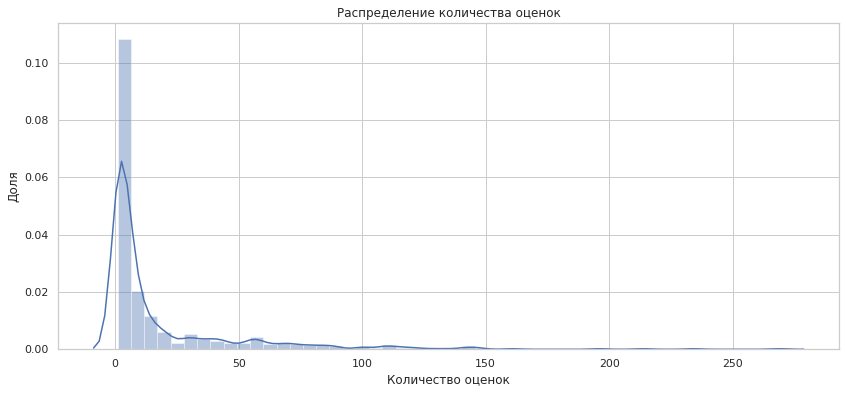

In [15]:
plt.figure(figsize=(14, 6))
sns.distplot(phones.reviews_cnt)
plt.title('Распределение количества оценок')
plt.xlabel('Количество оценок')
plt.ylabel('Доля')
plt.show()

Кто бы мог подумать -- у большинства моделей ну очень мало оценок. Давайте оставим только с $\geq 10$ оценками. Это важно сделать, потому что оценка -- случайная величина, мат. ожиданием которой является оценка, которую модель реально заслуживает. Рассмотрим среднюю оценку как случайную величину в предположении, что оценки, поставленные пользователями, независимы.

Пусть $\xi_{i}$ -- оценки, поставленные пользователями, $S_{n} = \sum_{i=1}^{n} \xi_{i}$. Тогда по центральной предельной теореме при $n \to \infty$ выполнено (под сходимостью подразумевается сходимость по распределению) $$\frac{S_n - \mathsf{E}S_{n}}{\sqrt{\mathsf{D}S_n}} \to \mathcal{N}(0;1) \Rightarrow \frac{S_n - n\mathsf{E}\xi}{\sqrt{n}\sqrt{\mathsf{D}\xi}} \to \mathcal{N}(0;1) \Rightarrow S_n - n\mathsf{E}\xi \to \mathcal{N}(0;n\mathsf{D}\xi) \Rightarrow \frac{S_n}{n} \to \mathcal{N}\left(\mathsf{E}\xi;\frac{\mathsf{D}\xi}{n}\right).$$
Тогда с вероятностью примерно 99.7% выполнено $ |S_n - \mathsf{E}\xi| < 3\sqrt{\frac{\mathsf{D}\xi}{n}} $ (с поправкой на то, что распределение не нормальное, а стремится к нормальному). Таким образом, чем больше число оценок, тем ближе их среднее значение к "реальной" оценке.

In [16]:
phones = phones[phones.reviews_cnt >= 10]

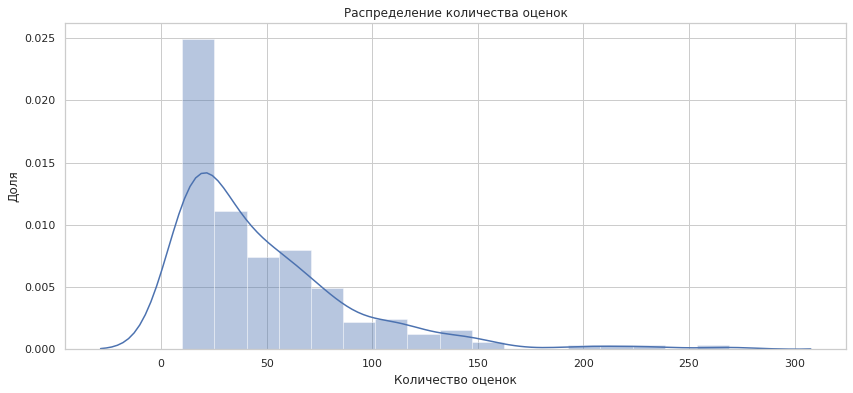

In [17]:
plt.figure(figsize=(14, 6))
sns.distplot(phones.reviews_cnt)
plt.title('Распределение количества оценок')
plt.xlabel('Количество оценок')
plt.ylabel('Доля')
plt.show()

Хотелось бы посмотреть зависимость от ценовой категории. Для этого:
1. Посмотрим на ценовые разбросы внутри моделей
2. Посчитаем "среднюю" цену, если эта величина будет иметь смысл
3. Посмотрим на распределение цен
4. Разделим на ценовые категории

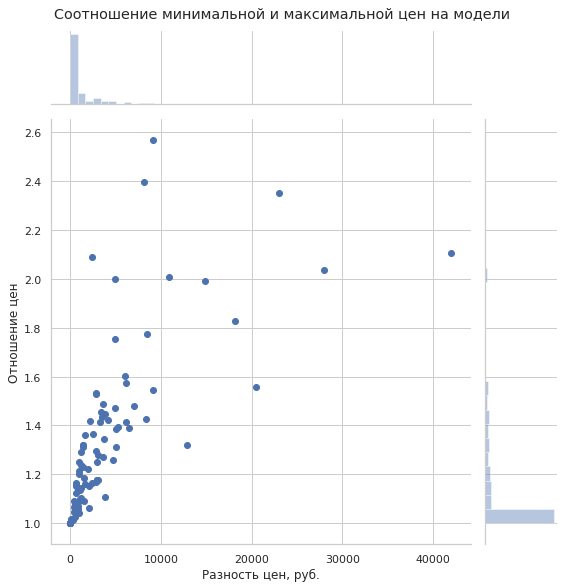

In [18]:
sns.jointplot(
    pd.Series(phones.max_price - phones.min_price, name='Разность цен, руб.'),
    pd.Series(phones.max_price / phones.min_price, name='Отношение цен'),
    height=8
)
plt.suptitle('Соотношение минимальной и максимальной цен на модели', y=1.02);

Что можно сказать: обычно цены практически не отличаются (большая часть отличий в предела 5000 и в пределах 10%). Поэтому можно считать среднюю цену как среднее арифметическое максимальной и минимальной.

In [19]:
phones['avg_price'] = (phones.min_price + phones.max_price) / 2

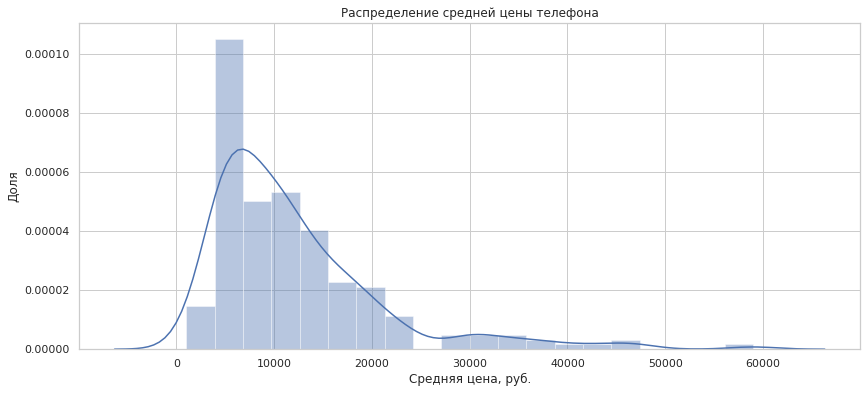

In [20]:
plt.figure(figsize=(14, 6))
sns.distplot(phones.avg_price)
plt.title('Распределение средней цены телефона')
plt.xlabel('Средняя цена, руб.')
plt.ylabel('Доля')
plt.show()

На основании этого распределения предлагаю следующие ценовые категории:
1. $0-7000$ рублей -- очень дешевые
2. $7000-12000$ рублей -- дешевые
3. $12000-25000$ -- средние
4. $> 25000$ -- дорогие (всё равно таких меньшинство, разбивать дальше не имеет смысл)

In [21]:
def get_price_segment(price):
    '''
    Возвращает строку -- название ценового сегмента.
    '''
    if price <= 7000:
        return 'very cheap'
    elif price <= 12000:
        return 'cheap'
    elif price <= 25000:
        return 'average'
    else:
        return 'expensive'

In [22]:
phones['price_segment'] = phones.avg_price.apply(get_price_segment)

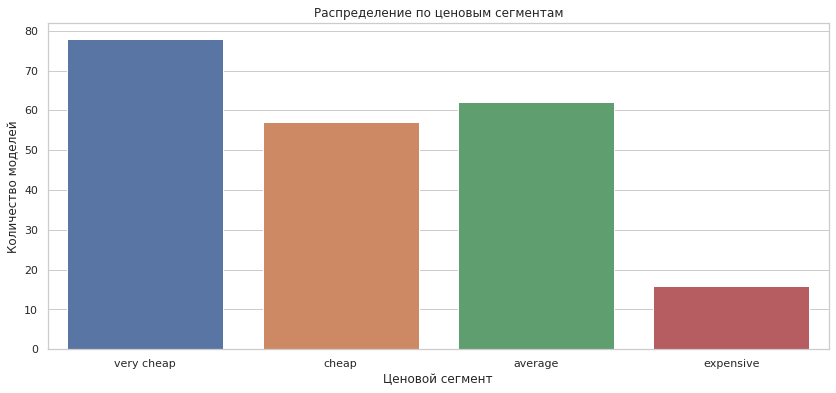

In [23]:
plt.figure(figsize=(14, 6))
sns.countplot(
    phones.price_segment,
    order=['very cheap', 'cheap', 'average', 'expensive']
)
plt.title('Распределение по ценовым сегментам')
plt.xlabel('Ценовой сегмент')
plt.ylabel('Количество моделей')
plt.show()

Впрочем, неудивительно. чем дешевле товар, тем охотнее его покупают. Особенно в стране с небольшим достатком.

Посмотрим, что там с оценками.

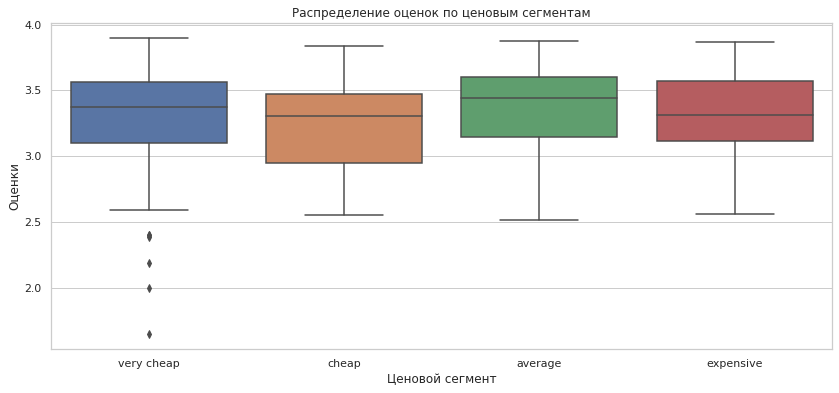

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=phones,
    x='price_segment', y='avg_rating',
    order=['very cheap', 'cheap', 'average', 'expensive']
)
plt.title('Распределение оценок по ценовым сегментам')
plt.xlabel('Ценовой сегмент')
plt.ylabel('Оценки')
plt.show()

Ну что тут скажешь, оценки от ценовой группы не зависят. Оценки держатся на уровне от 2.5 до 4, за исключением каких-то выбросов в самом дешёвом сегменте. Это выбросы вполне предсказуемы, тысяч за пару тысяч можно купить телефон, который будет после каждого нажатия думать по 5 минут.

Также можно заметить, что у среднего ценового сегмента повыше медиана и урони 25% и 75%. Это тоже можно понять, ведь именно в этом сегменте появляются "китайцы" с неплохим соотношением цена/качество и сносными камерами (к сожалению, сносность камеры нельзя оценить по техническим характеристикам, для этого нужно разбираться с текстовыми отзывами, а делать такое автоматизированно я не умею).

Вообще, я тут оценки сравниваю, а надо бы посмотреть, какие оценки пользователи чаще оставляют. Я уже упоминал, что платформы могут "обрубать" негативные отзывы в коммерческих целях, стоит оценить масштабы бедствия.

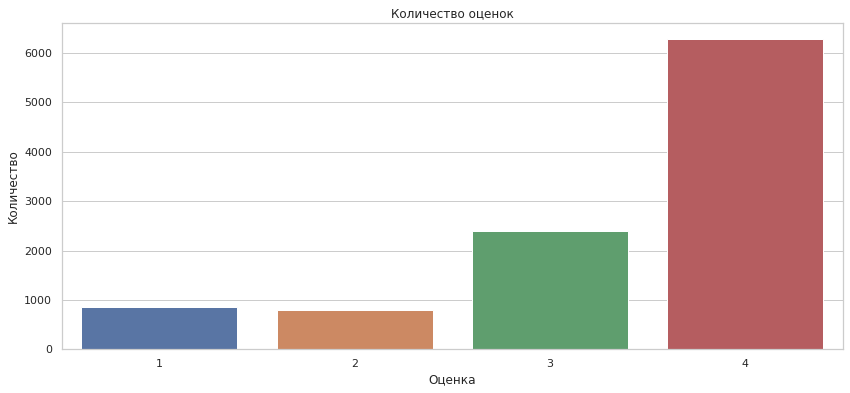

In [25]:
rates = [1, 2, 3, 4]
total = []
for i in rates:
    total.append(phones['num_{}'.format(i)].sum())
    
plt.figure(figsize=(14, 6))
sns.barplot(rates, total)
plt.title('Количество оценок')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

Да уж. То ли люди любят оставлять более высокие оценки, то ли кто-то накручивает, то ли просто у телефонов с более высокими оценками больше оценок стоит (например, их могут больше покупать).

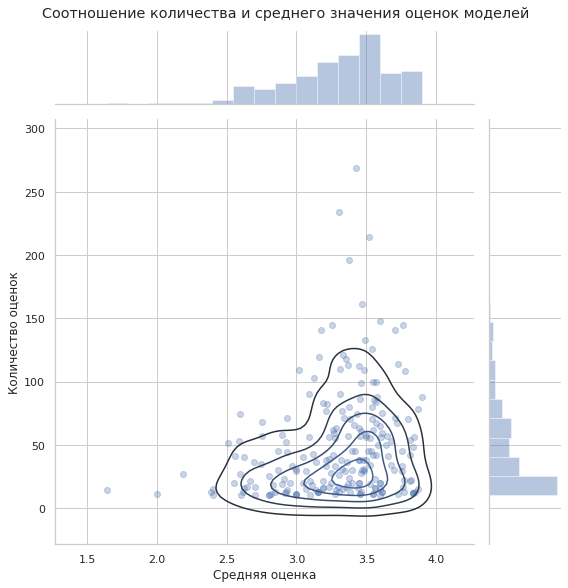

In [26]:
sns.jointplot(
    pd.Series(phones.avg_rating, name='Средняя оценка'),
    pd.Series(phones.reviews_cnt, name='Количество оценок'),
    height=8,
    alpha=0.3
).plot_joint(sns.kdeplot, n_levels=6)
plt.suptitle('Соотношение количества и среднего значения оценок моделей', y=1.02);

Действительно, предположение подствердилось. Модели с большим числом отзывов имеют тенденцию к высокой средней оценке. Накрутка всё ещё возможна:) Но чтобы это установить, надо смотреть на динамику оценок с течением времени, такое сложно собрать. Да и есть такая вероятность, что администраторы платформы сами борются с накруткой.


Многие люди используют телефон для того, чтобы оплачивать покупки. Для этого необходимо наличие чипа NFC. Давайте посмотрим, сколько телефонов из нашей базы им обладают и соотношения оценок телефонов с чипом и без него.

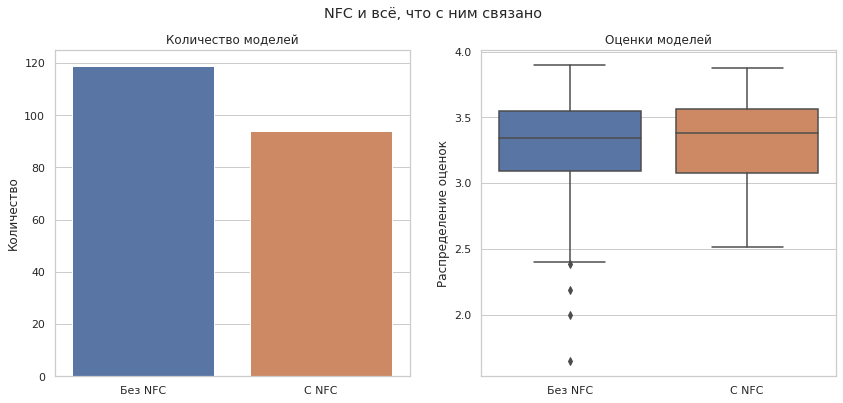

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(phones.nfc.apply(lambda x: 'C NFC' if x else 'Без NFC'), ax = ax1)
sns.boxplot(
    phones.nfc.apply(lambda x: 'C NFC' if x else 'Без NFC'),
    phones.avg_rating,
    ax = ax2
)
plt.suptitle('NFC и всё, что с ним связано')
ax1.set_title('Количество моделей')
ax1.set_xlabel('')
ax1.set_ylabel('Количество')
ax2.set_title('Оценки моделей')
ax2.set_xlabel('')
ax2.set_ylabel('Распределение оценок')
plt.show()

Получается, наличие NFC с оценкой не связано. Опять наблюдаются выбросы, скорее всего, связанные с тем что самые дешёвые и неудачные модели не обладают NFC в силу экономии при производстве.

Рассмотрим последний фактор -- то, как телефон лежит в руке. Этот фактор нельзя описать никакой технической характеристикой, однако можно попробовать описать несколькими. С моей точки зрения, удобство при использовании телефона наиболее сильно зависит от его размеров - диагонали экрана и толщины.

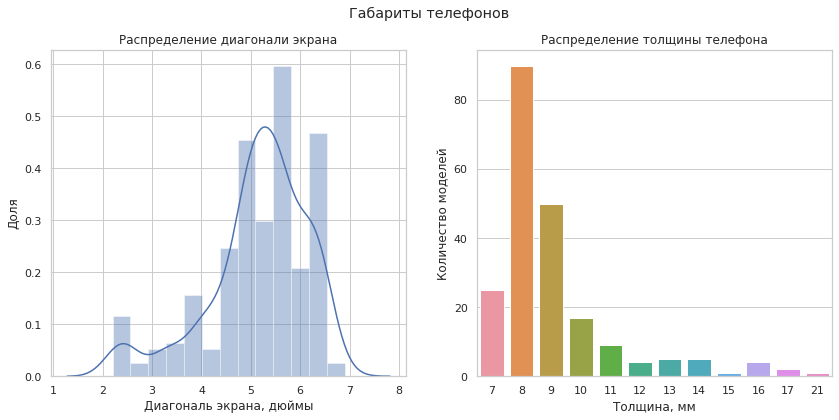

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.distplot(phones.screen_size, ax=ax1)
sns.countplot(phones.thickness, ax=ax2)
plt.suptitle('Габариты телефонов')
ax1.set_title('Распределение диагонали экрана')
ax1.set_xlabel('Диагональ экрана, дюймы')
ax1.set_ylabel('Доля')
ax2.set_title('Распределение толщины телефона')
ax2.set_xlabel('Толщина, мм')
ax2.set_ylabel('Количество моделей')
plt.show()

Предлагаю разбить на следующие категории: по диагонали экрана $\leq 4$, $4-5$, $5-6$, $>6$ дюймов, по толщине отдельно выделить $\geq 11$ миллиметров, так как все большие толщины представлены менее чем 10 телефонами, остальное оставить как есть.

In [29]:
def screen_cat(screen_size):
    if screen_size <= 4:
        return r"$\leq$ 4"
    elif screen_size <=5:
        return "4-5"
    elif screen_size <= 6:
        return "5-6"
    else:
        return r"$>$ 6"

phones['screen_cat'] = phones.screen_size.apply(screen_cat)
    
phones['thickness_cat'] = phones.thickness.astype(str)
phones.loc[phones.thickness >= 11, 'thickness_cat'] = r"$\geq$ 11"

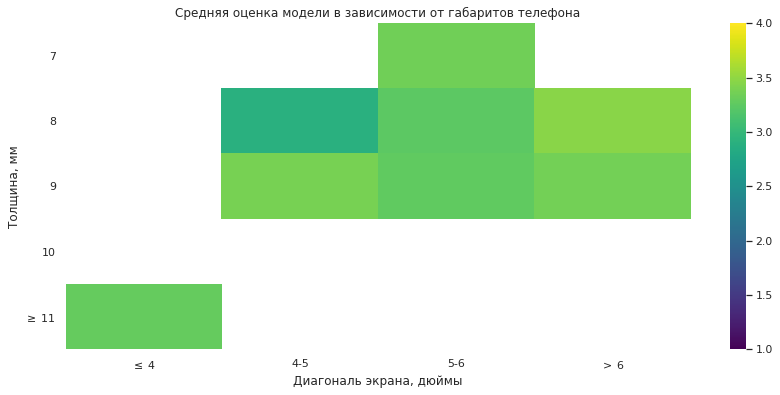

In [30]:
size_counts = phones.pivot_table(
    columns='screen_cat',
    index='thickness_cat',
    values= 'name',
    aggfunc=np.size
)
size_ratings = phones.pivot_table(
    columns='screen_cat',
    index='thickness_cat',
    values= 'avg_rating',
    aggfunc='mean'
)
size_ratings = size_ratings[size_counts >= 10]\
    .reindex([r"$\leq$ 4", "4-5", "5-6", r"$>$ 6"], axis=1)\
    .reindex(["7", "8", "9", "10", r"$\geq$ 11"], axis=0)
plt.figure(figsize=(14, 6))
sns.heatmap(
    size_ratings,
    cmap='viridis',
    vmin=1,
    vmax=4
)
plt.title('Средняя оценка модели в зависимости от габаритов телефона')
plt.xlabel('Диагональ экрана, дюймы')
plt.ylabel('Толщина, мм')
plt.yticks(rotation=0)
plt.show()

Заметим, что телефоны с диагональю более 6 дюймов оцениваются выше, чем телефоны с диагональю 5-6 дюймов, а хуже всех оцениваютсятелефоны с диагональю 4-5 дюймов и толщиной 8 мм. Однако, чётко выраженных тенденций всё равно нет.

**Вывод:** модели телефонов, получавшие большее число оценок, чаще получают оценки выше среднего (среди телефонов с $\geq 50$ оценками подвляющее большинство имеют среднюю оценку выше 3). Зависимость же оценок от характеристик телефона (цена, наличие NFC, габариты) выявить не удалось. Вероятно, оценка больше зависит от качества конкретной модели, чем от технических характеристик.

---
### Задача 4.

Некоторые студенты второго курса ФИВТ понадеявшись на отмену учета посещения занятий по курсу "Введение в анализ данных" решили дудосить гугл-опросники. Команда "Физтех.Статистики" без особых проблем смогла разделить результаты опроса на спамовые и настоящие, а также установить круг подозреваемых. Теперь это предлагается сделать вам как начинающим аналитикам.

Вам выдаются результаты нескольких опросов. 
1. Необходимо для каждой строки понять, является ли результат спамовым или настоящим. Результаты анализа необходимо прислать на почту вместе с решением.
2. Какими общими характеристиками обладают спамовые записи? Как часто они происходят?

Есть, конечно, стопроцентный способ -- сверится с таблицей курса. Но это неинтересно и вряд ли подразумевается в задаче. Поэтому я постараюсь смотреть на данные непредвзято, насколько уж получится. Беглого взгляда достаточно, чтобы понять, что 5 марта и 30 апреля ситуации кардинально отличаются: данные за 5 марта вполне адекватны, а вот 30 апреля кто-то решил просто поприкалываться, не особо заботясь о "красоте" операции. Поэтому я быду исследовать эти данные независимо.

**5 марта**

In [31]:
table_march = pd.read_excel('5_03.xlsx')
table_march.columns = ['timestamp', 'group', 'name']
table_march.head()

,timestamp,group,name
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений
1,2020-03-05 19:17:02.696,825,Чернов Андрей
2,2020-03-05 19:17:03.071,811,Чуров Дима
3,2020-03-05 19:17:03.192,824,Жуков Павел
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий


При просмотре таблички я заметил, что сначала запросы шли нормально, были знакомые имена (ну уж извините, совсем непредвзято не получилось). И количество записей не превышало 3-4 в секунду. Затем же началась вакханалия -- люди со странными именами и 6-8 записей в секунду. Поэтому давайте попробуем погруппировать записи по количеству записей в секунду и попробуем подобрать порог для отсеивания спама. Вы можете возвразить, что так под банхаммер могут попасть честные ребята, но давайте попробуем так, хотя бы для начала, так мы сможем отсечь круг записей, точно не попадающих под подозрение. Да и есть основание полагать, что дудос догадались запустить только тогда, когда большая часть отметилась.

Что же, приступим. Для начала немного обработаем.

In [32]:
table_march.timestamp = table_march.timestamp.astype('datetime64[s]')
# Вдруг совпадающие имена будут, перестрахуемся
table_march['unique'] = table_march.index
table_march.head()

,timestamp,group,name,unique
0,2020-03-05 18:07:33,Другая,Иванин Евгений,0
1,2020-03-05 19:17:02,825,Чернов Андрей,1
2,2020-03-05 19:17:03,811,Чуров Дима,2
3,2020-03-05 19:17:03,824,Жуков Павел,3
4,2020-03-05 19:17:04,813,Мальцев Дмитрий,4


In [33]:
writes_same_time = table_march[
    ['timestamp', 'unique']
].groupby('timestamp').count()

writes_same_time.columns = ['writes_same_time']
table_march = table_march.join(writes_same_time, on='timestamp')

А теперь разобьём записи на 2 группы: с "маленьким" числом одновременных записей -- эти записи выкинем из подозрения и с "большим" -- их рассмотрим отдельно. Для установления порога будем исходить из того, что числа студентов в потоке -- около 170 человек, а на лекции ходили многие. Посмотрим на зависимость числа принятых записей от порога.

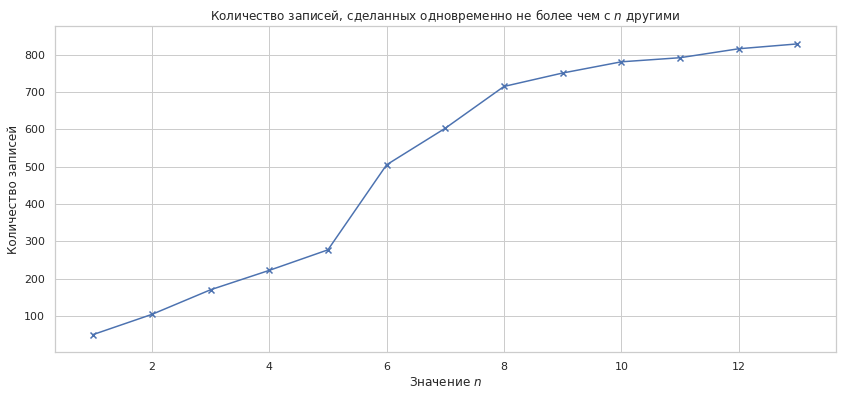

In [34]:
correct_count = table_march.groupby('writes_same_time').count()[['unique']]
correct_count = correct_count.cumsum()

plt.figure(figsize=(14, 6))
plt.plot(correct_count.index, correct_count.unique)
plt.scatter(correct_count.index, correct_count.unique, marker='x')
plt.title('Количество записей, сделанных одновременно не более чем с $n$ другими')
plt.xlabel('Значение $n$')
plt.ylabel('Количество записей')
plt.show()

Если мы признать валидными все записи с не более чем четырьмя соседями, то точно захватим лишнего. Но при этом в количестве записей с более чем 5 соседями наблюдается резкий скачок числа записей. Дело пахнет дудосом...

Предлагаю сделать так: записи с $\leq 3$ соседями признаем валидными, с $\geq 6$ соседями -- спамом, остальные изучаем.

In [35]:
def is_spam(num_writes):
    '''
    Проверяет запись на спам по количеству соседей.
    Если нельзя точно определить, возвращает None.
    '''
    if num_writes >= 6:
        return True
    elif num_writes <= 3:
        return False
    else:
        return None

In [36]:
table_march['is_spam'] = table_march.writes_same_time.apply(is_spam)

In [37]:
table_march.groupby('is_spam').count()[['unique']]

,unique
is_spam,
False,170
True,552


In [38]:
table_march[table_march.is_spam.isnull()].to_excel('march_susp.xlsx')

Внимательно посмотрев на оставшихся людей в сторонней программе, я попытался определить начало дудоса. Заметилось, что до Зубкова Денисия подохрительных имён не наблюдалось, кроме парочки, их выкинем отдельно. Ну и исключим из подозрения предыдущих.

In [39]:
start_ddos = 144
table_march.loc[
    table_march.is_spam.isnull() & (table_march.index < start_ddos),
    'is_spam'
] = False
table_march.loc[table_march.is_spam.isnull(), 'is_spam'] = True

Ну и выкинем странные имена. Я заметил "а" и "Саня Пмф"

In [40]:
table_march.loc[table_march.name == 'a', 'is_spam'] = True
table_march.loc[table_march.name == 'а', 'is_spam'] = True
table_march.loc[table_march.name == 'Саня Пмф', 'is_spam'] = True

Опять же методом пристального взгляда я обнаружил, что не весь дудос отметился. Давайте отметим как спам все с момента начала дудоса до конца (до последнего отмеченного как спам).

In [41]:
end_ddos = table_march[table_march.is_spam == True].unique.max()
table_march.loc[
    (table_march.index >= start_ddos) & (table_march.index < end_ddos),
    'is_spam'
] = True

In [42]:
table_march.groupby('is_spam').count()[['unique']]

,unique
is_spam,
False,160
True,669


In [43]:
table_march.to_excel(
    '5_03_final.xlsx',
    columns=['timestamp', 'group', 'name', 'is_spam']
)

Замечу, что скорее всего выкинут не весь спам. Да и невинные люди могли пострадать. Но что поделаешь.

**30 апреля**

Почитав табличку, можно обнаружить, что тут явно работали несколько спамеров. Один приблизительно так же, как 5 марта, другие просто творили какую-то дичь. От последствий их действий надо избавляться последовательно.

In [44]:
table_april = pd.read_excel('30_04.xlsx')
table_april.columns = ['timestamp', 'name', 'group']
table_april['is_spam'] = None
table_april.group = table_april.group.astype(str)
table_april.timestamp = table_april.timestamp.astype('datetime64[s]')
table_april['unique'] = table_april.index
table_april.dropna()
table_april.head()

,timestamp,name,group,is_spam,unique
0,2020-04-30 19:18:38,Астафуров Евгений Олегович,812,None,0
1,2020-04-30 19:18:41,Севец Владислав Сергеевич,Б05-825,None,1
2,2020-04-30 19:18:41,Голяр Димитрис Георгиевич,Б05-826,None,2
3,2020-04-30 19:18:42,ГУСЕВ РОМАН ЕВГЕНЬЕВИЧ,823,None,3
4,2020-04-30 19:18:42,Богданов Сергей Владимирович,Б05-821,None,4


Давайте сначала провалидируем значение группы. Я консервативный и считаю, что на лекции ходят только ФИВТы-второкурсники.

In [45]:
allowed_groups = [
    '811', '812', '813', '814', '831',
    '821', '822', '823', '824', '825',
    '826', '827',
    'Б05-811', 'Б05-812', 'Б05-813', 'Б05-814',
    'Б05-831', 'Б05-821', 'Б05-822', 'Б05-823',
    'Б05-824', 'Б05-825', 'Б05-826', 'Б05-827'
]
table_april.loc[
    np.logical_not(table_april.group.isin(allowed_groups)),
    'is_spam'
] = True

In [46]:
april_suspects = table_april.loc[table_april.is_spam.isnull()]
april_suspects.head()

,timestamp,name,group,is_spam,unique
0,2020-04-30 19:18:38,Астафуров Евгений Олегович,812,None,0
1,2020-04-30 19:18:41,Севец Владислав Сергеевич,Б05-825,None,1
2,2020-04-30 19:18:41,Голяр Димитрис Георгиевич,Б05-826,None,2
3,2020-04-30 19:18:42,ГУСЕВ РОМАН ЕВГЕНЬЕВИЧ,823,None,3
4,2020-04-30 19:18:42,Богданов Сергей Владимирович,Б05-821,None,4


Попробуем провернуть такую же штуку, как с 5 марта. Красным крестиком отметим границу, по которой отбирается не более 180 человек.

In [47]:
same_time_cnt = april_suspects.groupby('timestamp').count()[['unique']]
same_time_cnt.columns = ['writes_same_time']
table_april = table_april.join(same_time_cnt, on='timestamp')

In [48]:
april_suspects = table_april.loc[table_april.is_spam.isnull()]

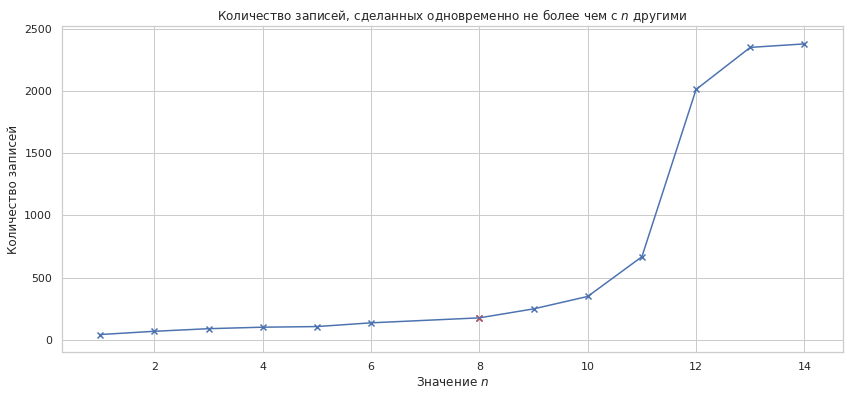

In [49]:
cnt_by_same_time = april_suspects.groupby('writes_same_time').count()[['unique']]
plot_data = cnt_by_same_time.cumsum()

point = plot_data[plot_data.unique <= 180].index.max()

plt.figure(figsize=(14, 6))
plt.plot(plot_data.index, plot_data.unique)
plt.scatter(plot_data.index, plot_data.unique, marker='x')
plt.scatter(point, plot_data.unique[point], marker='x', color='r')
plt.title('Количество записей, сделанных одновременно не более чем с $n$ другими')
plt.xlabel('Значение $n$')
plt.ylabel('Количество записей')
plt.show()

8 записей одновременно это немало, конечно, но пусть будет. Опять же, $\leq 8$ -- не спам, $\geq 11$ -- спам.

In [50]:
table_april.loc[table_april.writes_same_time <= 8, 'is_spam'] = False
table_april.loc[table_april.writes_same_time >= 11, 'is_spam'] = True

In [51]:
table_april.to_excel('apr.xlsx')

Методом пристального взгляда опять замечаем, что не весь явный спам отметился (люди без отчеств, незнакомые имена, подозрительные серии). Я сделаю так: найду первое отфильтрованное сообщение с большим числом "соседей" и без отчества, и последнее такое. Всё между ними забаню.

In [52]:
start_ddos = table_april[table_april.writes_same_time > 10].index.min()
end_ddos = table_april[table_april.writes_same_time > 10].index.max()
table_april.loc[
    (table_april.index >= start_ddos) & (table_april.index <= end_ddos),
    'is_spam'
] = True

In [53]:
april_suspects = table_april[table_april.is_spam.isnull()]
april_suspects

,timestamp,name,group,is_spam,unique,writes_same_time
2369,2020-04-30 19:25:28,Дружинин Андрей,811,None,2369,9.0
2370,2020-04-30 19:25:28,Лосев Захар,822,None,2370,9.0
2371,2020-04-30 19:25:28,Хохлов Даниил,811,None,2371,9.0
2372,2020-04-30 19:25:28,Глушков Дмитрий,831,None,2372,9.0
2373,2020-04-30 19:25:28,Басов Ярослав,811,None,2373,9.0
2374,2020-04-30 19:25:28,Платонов Василий,822,None,2374,9.0
2375,2020-04-30 19:25:28,Комаров Илья,825,None,2375,9.0
2376,2020-04-30 19:25:28,Кольцов Антон,826,None,2376,9.0
2377,2020-04-30 19:25:28,Савельев Николай,823,None,2377,9.0


Остались какие-то люди, которых я не знаю. Будем считать спамом

In [54]:
table_april.loc[table_april.is_spam.isnull(), 'is_spam'] = True

In [55]:
table_april.groupby('is_spam').count()[['unique']]

,unique
is_spam,
False,139
True,2326


140 человек на лекции -- похоже на адекватное число.

In [56]:
table_april.to_excel(
    '30_4_final.xlsx',
    columns=['timestamp', 'name', 'group', 'is_spam']
)

**Вывод:** Дудос таблички не помог в отмене учёта посещаемости. Но, возможно, такой цели и не было: 5 марта большинство людей, вызванных на перепроверку посещаемости, было фейками, так что какого-то успеха дудосеры достигли.